# Libraries

In [65]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Reading the dataset

df=pd.read_csv(r"C:\Users\User\Desktop\StudentsPerformance.csv")

In [66]:
# Displaying first few rows

df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33


In [67]:
# Checking for null values and displaying summary of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


**Insight : There are no null or missing values in the dataset**


# Cleaning dataset

In [68]:
# Renaming the columns

column_names=df.columns
for column in column_names:
    new_name=column.replace(" ","_")
    df.rename(columns={column:new_name},inplace=True)

In [69]:
df.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33


# Analysis

In [70]:
# Displaying the discriptive statistics of the dataset.

df.describe()

,math_score,reading_score,writing_score
count,1000.000000,1000.000000,1000.000000
mean,66.001000,69.195000,68.119000
std,15.569567,14.706436,15.226381
min,0.000000,17.000000,10.000000
25%,57.000000,59.000000,58.000000
50%,66.000000,70.000000,69.000000
75%,77.000000,79.250000,79.000000
max,100.000000,100.000000,100.000000


**Insight : from the above summary we can understand the average score of students in maths, reading and writing as well as the 25%, 50%, 75% of the score obtained by the students
<br> ●  we can also see that the mean and median are close to each other**

Text(0.5, 1.0, 'Count of Male and Female Particpants')

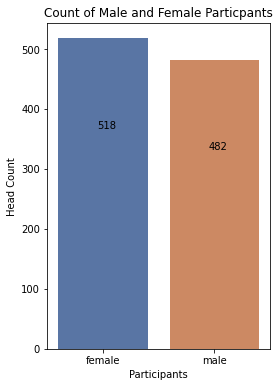

In [71]:
#displaying the count of males and females in the dataset

fig_dims = (4, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x='gender', data=df, palette='deep')

for p in ax.patches:
    ax.annotate(p.get_height() , (p.get_x()+0.35, p.get_height()-150))

plt.xlabel("Participants")
plt.ylabel("Head Count")
plt.title("Count of Male and Female Particpants")

**Insight : we can see that there are 518 female students and 482 male students participated in the test which also indicates that the number of male participants are less compared to the female students**

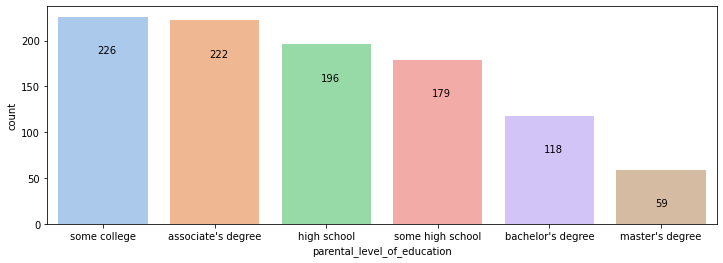

In [72]:
# Displaying the level of parental education

fig_dims = (12, 4)
fig, bx = plt.subplots(figsize=fig_dims)

sns.countplot(x='parental_level_of_education',data=df,  order = df['parental_level_of_education'].value_counts().index, palette='pastel')

for p in bx.patches:
    bx.annotate(p.get_height() , (p.get_x()+0.35, p.get_height()-40))


**Insight : according the plot we can say that the illiteracy rate among the parents is 0% and the education level of parents is classified into six categories**
<br> ● **Also we can deduct that parents have completed the basic level of education and 39.9% of them are well educated and are degree holders**

In [73]:
# Calculating the average of the math, reading and writing scores based on gender

avg1 = df.groupby(['gender'])['math_score'].mean()
avg2 = df.groupby(['gender'])['reading_score'].mean()
avg3 = df.groupby(['gender'])['writing_score'].mean()
print(avg1, avg2, avg3)

gender
female    63.376448
male      68.821577
Name: math_score, dtype: float64 gender
female    72.590734
male      65.545643
Name: reading_score, dtype: float64 gender
female    72.467181
male      63.446058
Name: writing_score, dtype: float64


**Insight : 
<br> ● The highest average math score is secured by males ie. 68.821577
<br> ● The highest average reading score is secured by females ie. 72.590734
<br> ● The highest average writing score is secured by females ie. 72.467181**

In [74]:
# Calculating the average of the math, reading and writing scores based on test preparation course

avg4 = df.groupby(['test_preparation_course'])['math_score'].mean()
avg5 = df.groupby(['test_preparation_course'])['reading_score'].mean()
avg6 = df.groupby(['test_preparation_course'])['writing_score'].mean()
print(avg4, avg5, avg6)

test_preparation_course
completed    69.96648
none         63.78972
Name: math_score, dtype: float64 test_preparation_course
completed    74.175978
none         66.417445
Name: reading_score, dtype: float64 test_preparation_course
completed    74.684358
none         64.457944
Name: writing_score, dtype: float64


**Insight : the students who took the test preparation course have a higher average score than students who did not take the course, it can be seen in maths, reading and as well as writing score, so it can be concluded that students who took the test preparation course have a higher chance of scoring more in the test**

# Scoring variation for math, reading and writing based on gender

In [89]:
# Calculating mean of math score based on gender

df.groupby('gender')['math_score'].mean()

gender
female    63.376448
male      68.821577
Name: math_score, dtype: float64

In [90]:
# Calculating standard deviation of math score based on gender

df.groupby('gender')['math_score'].std()

gender
female    16.029928
male      14.556411
Name: math_score, dtype: float64

**Insight : standard deviation for female students is greater than that for male students or we can say that the data is slightly more dispersed in the case of female students than in male students**

In [91]:
# Calculating mean of reading score based on gender

df.groupby('gender')['reading_score'].mean()

gender
female    72.590734
male      65.545643
Name: reading_score, dtype: float64

In [92]:
# Calculating standard deviation of reading score based on gender

df.groupby('gender')['reading_score'].std()

gender
female    14.411018
male      14.149594
Name: reading_score, dtype: float64

**Insight : we can say that the data is equally dispersed in the case of female and male students**

In [95]:
# Calculating mean of writing score based on gender

df.groupby('gender')['writing_score'].mean()

gender
female    72.467181
male      63.446058
Name: writing_score, dtype: float64

In [96]:
# Calculating standard deviation of writing score based on gender


df.groupby('gender')['writing_score'].std()

gender
female    14.844842
male      14.227225
Name: writing_score, dtype: float64

**Insight : here also we can say that the data is equally dispersed in the case of female and male students**

# Scoring variation for math, reading and writing based on test preparation course

In [103]:
# Calculating mean of math score based on test preparation course

df.groupby('test_preparation_course')['math_score'].mean()

test_preparation_course
completed    69.96648
none         63.78972
Name: math_score, dtype: float64

In [104]:
# Calculating standard deviation of math score based on test preparation course

df.groupby('test_preparation_course')['math_score'].std()

test_preparation_course
completed    14.521847
none         15.705689
Name: math_score, dtype: float64

**Insight : we can see that the standard deviation for math score based on  test preparation course for completed students are lower than for students who did not attend the course**

In [105]:
# Calculating mean of reading score based on test preparation course

df.groupby('test_preparation_course')['reading_score'].mean()

test_preparation_course
completed    74.175978
none         66.417445
Name: reading_score, dtype: float64

In [106]:
# Calculating standard deviation of reading score based on test preparation course

df.groupby('test_preparation_course')['reading_score'].std()

test_preparation_course
completed    13.537572
none         14.608896
Name: reading_score, dtype: float64

**Insight : we can see that the standard deviation for reading score based on  test preparation course for completed students are lower than for students who did not attend the course**

In [107]:
# Calculating mean of writing score based on test preparation course

df.groupby('test_preparation_course')['writing_score'].mean()

test_preparation_course
completed    74.684358
none         64.457944
Name: writing_score, dtype: float64

In [108]:
# Calculating standard deviation of writing score based on test preparation course

df.groupby('test_preparation_course')['writing_score'].std()

test_preparation_course
completed    13.236412
none         15.041667
Name: writing_score, dtype: float64

**Insight : we can see that the standard deviation for writing score based on  test preparation course for completed students are lower than for students who did not attend the course**

In [109]:
df.describe()

,math_score,reading_score,writing_score
count,1000.000000,1000.000000,1000.000000
mean,66.001000,69.195000,68.119000
std,15.569567,14.706436,15.226381
min,0.000000,17.000000,10.000000
25%,57.000000,59.000000,58.000000
50%,66.000000,70.000000,69.000000
75%,77.000000,79.250000,79.000000
max,100.000000,100.000000,100.000000


**Insight : we can see that the 75% quartile starts from 77.0 for math score which means that the top 25% of the students have scores 77 and above**

In [110]:
top = df.sort_values('math_score',ascending=False)

In [117]:
top.head(int(len(df)*(25/100)))

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
999,male,group E,bachelor's degree,standard,completed,100,100,100
996,male,group A,some college,standard,completed,100,96,86
515,female,group E,some college,standard,none,100,92,97
517,female,group E,associate's degree,standard,none,100,100,100
516,female,group E,bachelor's degree,standard,none,100,100,100
...,...,...,...,...,...,...,...,...
856,male,group E,some high school,standard,completed,77,76,77
855,male,group E,associate's degree,free/reduced,completed,77,69,68
854,male,group D,some high school,standard,completed,77,68,69
853,male,group D,associate's degree,free/reduced,none,77,78,73


**Insight : This the details of the students who are the top 25% in math test, there are 250 students who scored top 25%
in the math test**